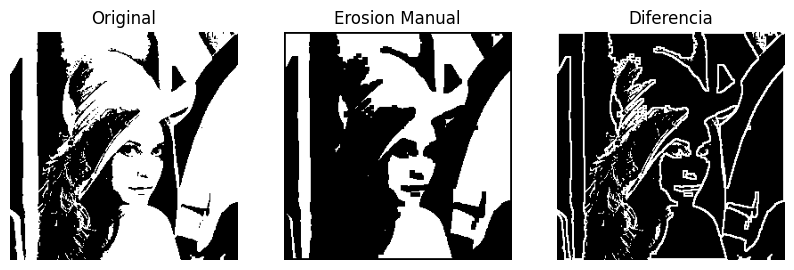

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def erosion_manual(imagen, kernel):
    altura, ancho = imagen.shape
    kh, kw = kernel.shape

    # Calcula el padding necesario para que el kernel se ajuste completamente a la imagen
    ph = kh // 2
    pw = kw // 2

    # Crea una imagen resultado con el mismo tamaño que la original
    resultado = np.zeros_like(imagen)

    # Aplica la erosión
    for y in range(ph, altura - ph):
        for x in range(pw, ancho - pw):
            # Extrae la región vecina definida por el tamaño del kernel
            vecindario = imagen[y-ph:y+ph+1, x-pw:x+pw+1]
            erosion = np.min(vecindario[kernel == 1])
            resultado[y, x] = erosion

    return resultado

# Carga la imagen
imagen = cv2.imread("C:/Users/luisl/OneDrive/Escritorio/PDI/Estancia Investigacion/Recursos/lenna.jpg", cv2.IMREAD_GRAYSCALE)

# Binariza la imagen
_, imgB = cv2.threshold(imagen, 120, 255, cv2.THRESH_BINARY)

# Define el kernel (tamaño 5x5)
kernel_cruz = np.array([[1, 1, 1, 1, 1],
                         [1, 1, 1, 1, 1],
                         [1, 1, 1, 1, 1],
                         [1, 1, 1, 1, 1],
                         [1, 1, 1, 1, 1]], dtype=np.uint8)

# Aplica la función de erosión manual con el kernel de la cruz
erosion_manual_resultado = erosion_manual(imgB, kernel_cruz)

diferencia = imgB - erosion_manual_resultado

# Muestra la imagen original y la imagen después de la erosión
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(imgB, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(erosion_manual_resultado, cmap='gray')
plt.title('Erosion Manual')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(diferencia, cmap='gray')
plt.title('Diferencia')
plt.axis('off')

plt.show()